In [35]:
# importing necessary libraries.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

In [36]:
# importing dataset....
bowler= pd.read_csv('bowler data t20i.csv')
batsman = pd.read_csv('batsman data t20i.csv')
keeper = pd.read_csv('wicketkeeper data t20i.csv')

In [37]:
bowler

,Player Name,Country,Time Period,Matches,Played,Overs,Maiden Overs,Runs,Wickets,Best Figure,Bowling Average,Economy Rate,Strike Rate,Four Wickets,Five Wickets
0,B Kumar,India,2016-2022,6,6,23.0,3,123,13,5/4,9.46,5.34,10.6,1,1
1,Amjad Javed,UAE,2016-2016,7,7,23.0,0,169,12,3/25,14.08,7.34,11.5,0,0
2,Al-Amin Hossain,Bangladesh,2016-2016,5,5,16.5,0,134,11,3/25,12.18,7.96,9.1,0,0
3,Mohammad Naveed,UAE,2016-2016,7,7,27.4,2,145,11,3/14,13.18,5.24,15.0,0,0
4,Rashid Khan,Afghanistan,2016-2022,8,8,31.0,0,202,11,3/22,18.36,6.51,16.9,0,0
5,HH Pandya,India,2016-2022,8,8,29.3,1,207,11,3/8,18.81,7.01,16.0,0,0
6,PWH de Silva,Sri Lanka,2022-2022,6,6,23.0,0,170,9,3/21,18.88,7.39,15.3,0,0
7,Shadab Khan,Pakistan,2022-2022,5,5,18.4,0,113,8,4/8,14.12,6.05,14.0,1,0
8,Haris Rauf,Pakistan,2022-2022,6,6,20.0,0,153,8,3/29,19.12,7.65,15.0,0,0
9,Mohammad Nawaz,Pakistan,2016-2022,8,8,24.4,0,174,8,3/5,21.75,7.05,18.5,0,0


In [38]:
batsman

,Player Name,Country,Time Period,Matches,Played,Not Outs,Runs,Highest Score,Batting Average,Balls Faced,Strike Rate,Centuries,Fifties,Ducks,Fours,Sixes
0,V Kohli,India,2016-2022,10,9,4,429,122,85.80,325,132.00,1,3,1,40,11
1,Mohammad Rizwan,Pakistan,2022-2022,6,6,1,281,78,56.20,239,117.57,0,3,0,21,6
2,RG Sharma,India,2016-2022,9,9,0,271,83,30.11,192,141.14,0,2,1,27,12
3,Babar Hayat,Hong Kong,2016-2022,5,5,0,235,122,47.00,160,146.87,1,1,1,22,10
4,Ibrahim Zadran,Afghanistan,2022-2022,5,5,2,196,64,65.33,188,104.25,0,1,0,14,4
5,PBB Rajapaksa,Sri Lanka,2022-2022,6,6,2,191,71,47.75,128,149.21,0,1,0,15,9
6,Sabbir Rahman,Bangladesh,2016-2022,6,6,1,181,80,36.20,148,122.29,0,1,0,16,5
7,Muhammad Usman,UAE,2016-2016,7,7,1,176,46,29.33,149,118.12,0,0,0,21,5
8,Najibullah Zadran,Afghanistan,2016-2022,8,8,3,176,60,35.20,112,157.14,0,1,1,6,13
9,P Nissanka,Sri Lanka,2022-2022,6,6,1,173,55,34.60,150,115.33,0,2,0,15,5


In [39]:
keeper

,Player Name,Country,Time Period,Matches,Played,Dismissals,Catches,Stumpings,Maximum Dismissals
0,MS Dhoni,India,2016-2016,5,5,7,6,1,3
1,SP Patil,UAE,2016-2016,7,7,7,6,1,2
2,LD Chandimal,Sri Lanka,2016-2016,4,3,4,4,0,2
3,Sultan Ahmed,Oman,2016-2016,3,3,4,2,2,3
4,KD Karthik,India,2022-2022,3,1,3,3,0,3
5,Nurul Hasan,Bangladesh,2016-2016,2,2,3,0,3,2
6,Mohammad Shahzad,Afghanistan,2016-2016,3,3,3,1,2,2
7,Rahmanullah Gurbaz,Afghanistan,2022-2022,5,5,3,3,0,2
8,BKG Mendis,Sri Lanka,2022-2022,6,6,3,3,0,2
9,Mohammad Rizwan,Pakistan,2022-2022,6,6,3,3,0,1


In [40]:
batsman = batsman.drop(38)

In [41]:
bat_features = ['Player Name','Batting Average','Strike Rate','Runs', 'Not Outs'] # features considered.
batsman = batsman.dropna(subset=bat_features) # remove rows not dont have numerical value from the features.
batsman = batsman[bat_features].copy()
batsman['Type'] = 'Batsmen'
batsman

,Player Name,Batting Average,Strike Rate,Runs,Not Outs,Type
0,V Kohli,85.80,132.00,429,4,Batsmen
1,Mohammad Rizwan,56.20,117.57,281,1,Batsmen
2,RG Sharma,30.11,141.14,271,0,Batsmen
3,Babar Hayat,47.00,146.87,235,0,Batsmen
4,Ibrahim Zadran,65.33,104.25,196,2,Batsmen
5,PBB Rajapaksa,47.75,149.21,191,2,Batsmen
6,Sabbir Rahman,36.20,122.29,181,1,Batsmen
7,Muhammad Usman,29.33,118.12,176,1,Batsmen
8,Najibullah Zadran,35.20,157.14,176,3,Batsmen
9,P Nissanka,34.60,115.33,173,1,Batsmen


In [42]:
ball_features = ['Player Name', 'Wickets','Bowling Average','Economy Rate'] # features considered.
bowler = bowler.dropna(subset=ball_features)
bowler = bowler[ball_features].copy()
bowler['Type'] = 'Bowler'
bowler

,Player Name,Wickets,Bowling Average,Economy Rate,Type
0,B Kumar,13,9.46,5.34,Bowler
1,Amjad Javed,12,14.08,7.34,Bowler
2,Al-Amin Hossain,11,12.18,7.96,Bowler
3,Mohammad Naveed,11,13.18,5.24,Bowler
4,Rashid Khan,11,18.36,6.51,Bowler
5,HH Pandya,11,18.81,7.01,Bowler
6,PWH de Silva,9,18.88,7.39,Bowler
7,Shadab Khan,8,14.12,6.05,Bowler
8,Haris Rauf,8,19.12,7.65,Bowler
9,Mohammad Nawaz,8,21.75,7.05,Bowler


In [43]:
wicket_features = ['Player Name', 'Catches','Stumpings','Maximum Dismissals']
keeper = keeper.dropna(subset=wicket_features) # remove rows not dont have numerical value from the features.
keeper = keeper[wicket_features].copy()
keeper['Type'] = 'Keeper'
keeper

,Player Name,Catches,Stumpings,Maximum Dismissals,Type
0,MS Dhoni,6,1,3,Keeper
1,SP Patil,6,1,2,Keeper
2,LD Chandimal,4,0,2,Keeper
3,Sultan Ahmed,2,2,3,Keeper
4,KD Karthik,3,0,3,Keeper
5,Nurul Hasan,0,3,2,Keeper
6,Mohammad Shahzad,1,2,2,Keeper
7,Rahmanullah Gurbaz,3,0,2,Keeper
8,BKG Mendis,3,0,2,Keeper
9,Mohammad Rizwan,3,0,1,Keeper


In [44]:
bat_features.remove('Player Name')
ball_features.remove('Player Name')
wicket_features.remove('Player Name')
features = bat_features+ball_features+wicket_features
# features
#print( len(batsman)+len(bowler)+len(keeper))
# test= []
# test.append( batsman['Player Name'])
# test.append( bowler['Player Name'])
# test.append( keeper['Player Name'])
# len(test[0])+len(test[1])+len(test[2])

In [45]:
players = pd.concat([batsman,bowler,keeper], ignore_index = True , sort = False)
players = players.fillna(0)
# players.index.duplicated()
# # players[players.index.duplicated()]
# players = players.loc[~players.index.duplicated(), :]
# players.index.duplicated()
# len(players)

In [46]:
# scaling the data.
scaler = StandardScaler()
scaled = pd.DataFrame( scaler.fit_transform(players[features] ), columns=features)
scaled.insert(0,'Player Name', players['Player Name'])
scaled.insert(1,'Field',players['Type'])
scaled

,Player Name,Field,Batting Average,Strike Rate,Runs,Not Outs,Wickets,Bowling Average,Economy Rate,Catches,Stumpings,Maximum Dismissals
0,V Kohli,Batsmen,3.777885,1.214616,4.680345,4.294641,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357
1,Mohammad Rizwan,Batsmen,2.215830,0.984172,2.810181,0.706280,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357
2,RG Sharma,Batsmen,0.839006,1.360580,2.683818,-0.489840,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357
3,Babar Hayat,Batsmen,1.730327,1.452087,2.228913,-0.489840,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357
4,Ibrahim Zadran,Batsmen,2.697640,0.771454,1.736100,1.902401,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357
...,...,...,...,...,...,...,...,...,...,...,...,...
100,Mushfiqur Rahim,Keeper,-0.749962,-0.893398,-0.740604,-0.489840,-0.719899,-0.711211,-0.775826,0.615125,2.124265,1.073663
101,SS McKechnie,Keeper,-0.749962,-0.893398,-0.740604,-0.489840,-0.719899,-0.711211,-0.775826,0.615125,-0.223607,1.073663
102,N Dickwella,Keeper,-0.749962,-0.893398,-0.740604,-0.489840,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357
103,C Carter,Keeper,-0.749962,-0.893398,-0.740604,-0.489840,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357


In [47]:
''' To find how many clusers are to be formed '''
def elbow_plot( min_k, max_k, k_max_iter):
    sum_squared_distances = []
    k_range = range(min_k,max_k+1)
    for k in k_range:
        km = KMeans(n_clusters=k,
                    max_iter=k_max_iter,
                    init = 'k-means++',
                    n_init=50,
                   random_state=0)
        km.fit(scaled[features])
        sum_squared_distances.append(km.inertia_)
        
    # Plot the score for each value of k
    plt.plot(k_range, sum_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

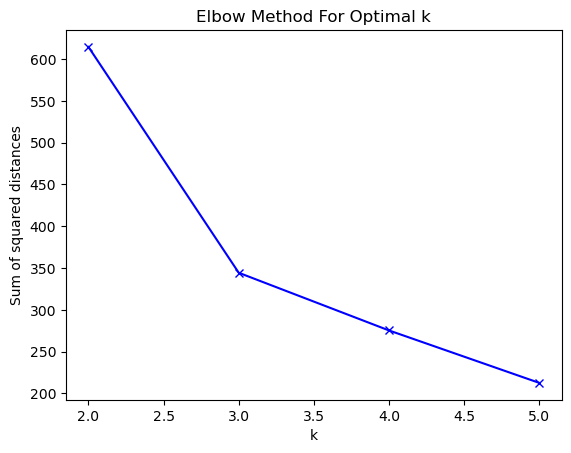

In [48]:
elbow_plot(2,5,10)

In [49]:
# Clustering the players using k-means algorithm.
km = KMeans(n_clusters=3,n_init=50)
km.fit(scaled[features]) # assigning the cluster number for each datapoint in the dataframe.
scaled['Cluster'] = km.labels_
scaled

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Player Name,Field,Batting Average,Strike Rate,Runs,Not Outs,Wickets,Bowling Average,Economy Rate,Catches,Stumpings,Maximum Dismissals,Cluster
0,V Kohli,Batsmen,3.777885,1.214616,4.680345,4.294641,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357,0
1,Mohammad Rizwan,Batsmen,2.215830,0.984172,2.810181,0.706280,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357,0
2,RG Sharma,Batsmen,0.839006,1.360580,2.683818,-0.489840,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357,0
3,Babar Hayat,Batsmen,1.730327,1.452087,2.228913,-0.489840,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357,0
4,Ibrahim Zadran,Batsmen,2.697640,0.771454,1.736100,1.902401,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Mushfiqur Rahim,Keeper,-0.749962,-0.893398,-0.740604,-0.489840,-0.719899,-0.711211,-0.775826,0.615125,2.124265,1.073663,2
101,SS McKechnie,Keeper,-0.749962,-0.893398,-0.740604,-0.489840,-0.719899,-0.711211,-0.775826,0.615125,-0.223607,1.073663,2
102,N Dickwella,Keeper,-0.749962,-0.893398,-0.740604,-0.489840,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357,0
103,C Carter,Keeper,-0.749962,-0.893398,-0.740604,-0.489840,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357,0


In [50]:
b0 = scaled.loc[scaled['Cluster']==0]
b1 = scaled.loc[scaled['Cluster']==1]
b2 = scaled.loc[scaled['Cluster']==2]

In [51]:
print( len(b0), len(b1), len(b2))

51 41 13


In [52]:
b0

,Player Name,Field,Batting Average,Strike Rate,Runs,Not Outs,Wickets,Bowling Average,Economy Rate,Catches,Stumpings,Maximum Dismissals,Cluster
0,V Kohli,Batsmen,3.777885,1.214616,4.680345,4.294641,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357,0
1,Mohammad Rizwan,Batsmen,2.215830,0.984172,2.810181,0.706280,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357,0
2,RG Sharma,Batsmen,0.839006,1.360580,2.683818,-0.489840,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357,0
3,Babar Hayat,Batsmen,1.730327,1.452087,2.228913,-0.489840,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357,0
4,Ibrahim Zadran,Batsmen,2.697640,0.771454,1.736100,1.902401,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357,0
5,PBB Rajapaksa,Batsmen,1.769906,1.489456,1.672919,1.902401,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357,0
6,Sabbir Rahman,Batsmen,1.160388,1.059549,1.546556,0.706280,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357,0
7,Muhammad Usman,Batsmen,0.797844,0.992955,1.483375,0.706280,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357,0
8,Najibullah Zadran,Batsmen,1.107616,1.616096,1.483375,3.098521,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357,0
9,P Nissanka,Batsmen,1.075953,0.948399,1.445466,0.706280,-0.719899,-0.711211,-0.775826,-0.307562,-0.223607,-0.353357,0


In [53]:
b1

,Player Name,Field,Batting Average,Strike Rate,Runs,Not Outs,Wickets,Bowling Average,Economy Rate,Catches,Stumpings,Maximum Dismissals,Cluster
48,B Kumar,Bowler,-0.749962,-0.893398,-0.740604,-0.48984,2.960483,0.102742,0.707367,-0.307562,-0.223607,-0.353357,1
49,Amjad Javed,Bowler,-0.749962,-0.893398,-0.740604,-0.48984,2.677377,0.500253,1.262869,-0.307562,-0.223607,-0.353357,1
50,Al-Amin Hossain,Bowler,-0.749962,-0.893398,-0.740604,-0.48984,2.394270,0.336775,1.435075,-0.307562,-0.223607,-0.353357,1
51,Mohammad Naveed,Bowler,-0.749962,-0.893398,-0.740604,-0.48984,2.394270,0.422816,0.679591,-0.307562,-0.223607,-0.353357,1
52,Rashid Khan,Bowler,-0.749962,-0.893398,-0.740604,-0.48984,2.394270,0.868511,1.032336,-0.307562,-0.223607,-0.353357,1
53,HH Pandya,Bowler,-0.749962,-0.893398,-0.740604,-0.48984,2.394270,0.907230,1.171211,-0.307562,-0.223607,-0.353357,1
54,PWH de Silva,Bowler,-0.749962,-0.893398,-0.740604,-0.48984,1.828058,0.913253,1.276757,-0.307562,-0.223607,-0.353357,1
55,Shadab Khan,Bowler,-0.749962,-0.893398,-0.740604,-0.48984,1.544952,0.503695,0.904570,-0.307562,-0.223607,-0.353357,1
56,Haris Rauf,Bowler,-0.749962,-0.893398,-0.740604,-0.48984,1.544952,0.933902,1.348972,-0.307562,-0.223607,-0.353357,1
57,Mohammad Nawaz,Bowler,-0.749962,-0.893398,-0.740604,-0.48984,1.544952,1.160192,1.182321,-0.307562,-0.223607,-0.353357,1


In [54]:
b2

,Player Name,Field,Batting Average,Strike Rate,Runs,Not Outs,Wickets,Bowling Average,Economy Rate,Catches,Stumpings,Maximum Dismissals,Cluster
89,MS Dhoni,Keeper,-0.749962,-0.893398,-0.740604,-0.48984,-0.719899,-0.711211,-0.775826,5.228560,2.124265,3.927704,2
90,SP Patil,Keeper,-0.749962,-0.893398,-0.740604,-0.48984,-0.719899,-0.711211,-0.775826,5.228560,2.124265,2.500683,2
91,LD Chandimal,Keeper,-0.749962,-0.893398,-0.740604,-0.48984,-0.719899,-0.711211,-0.775826,3.383186,-0.223607,2.500683,2
92,Sultan Ahmed,Keeper,-0.749962,-0.893398,-0.740604,-0.48984,-0.719899,-0.711211,-0.775826,1.537812,4.472136,3.927704,2
93,KD Karthik,Keeper,-0.749962,-0.893398,-0.740604,-0.48984,-0.719899,-0.711211,-0.775826,2.460499,-0.223607,3.927704,2
94,Nurul Hasan,Keeper,-0.749962,-0.893398,-0.740604,-0.48984,-0.719899,-0.711211,-0.775826,-0.307562,6.820007,2.500683,2
95,Mohammad Shahzad,Keeper,-0.749962,-0.893398,-0.740604,-0.48984,-0.719899,-0.711211,-0.775826,0.615125,4.472136,2.500683,2
96,Rahmanullah Gurbaz,Keeper,-0.749962,-0.893398,-0.740604,-0.48984,-0.719899,-0.711211,-0.775826,2.460499,-0.223607,2.500683,2
97,BKG Mendis,Keeper,-0.749962,-0.893398,-0.740604,-0.48984,-0.719899,-0.711211,-0.775826,2.460499,-0.223607,2.500683,2
98,Mohammad Rizwan,Keeper,-0.749962,-0.893398,-0.740604,-0.48984,-0.719899,-0.711211,-0.775826,2.460499,-0.223607,1.073663,2
